# Project: Investigate TMDB movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies from the The Movie Database (TMDb) including user ratings and revenue.


> this report will take us in a journey through time to discover how popularity, rating average, spending and revenue changed for each genre in the top 10.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
%matplotlib inline 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [2]:
df.shape

(10866, 21)

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we check for cleanliness, and then trim and clean the dataset for analysis.

> First some columns will be dropped as it will be not benefecial for our analysis like imdb_id, original_title, homepage, tagline, keywords, and release date as release year will be sufficient.

In [3]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#to drop columns
df.drop(['imdb_id', 'original_title', 'homepage', 'tagline', 'keywords', 'release_date'], axis=1, inplace=True)
df.head()

,id,popularity,budget,revenue,cast,director,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
# Checking null values
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [34]:
# Checking duplicates and dropping them
df.duplicated().sum()

0

In [35]:
# to make sure the duplicate column is dropped
df.drop_duplicates(inplace=True)
df.shape

(10865, 15)

#### We have many null rows in the genre section and we are going to drop them upon asking questions about genres to avoid losing useful data investigating other variables.
#### Although the isnull function is showing no null values in the budget_adj and revenue_adj sections, the describe function shows that many values are entered as 0. These values will be dropped along other illogical values when answering question aboud budget and revenue.

<a id='eda'></a>
## Exploratory Data Analysis

> In this section we will try to answer the questions we posed in the introduction using visualization

### general visualization

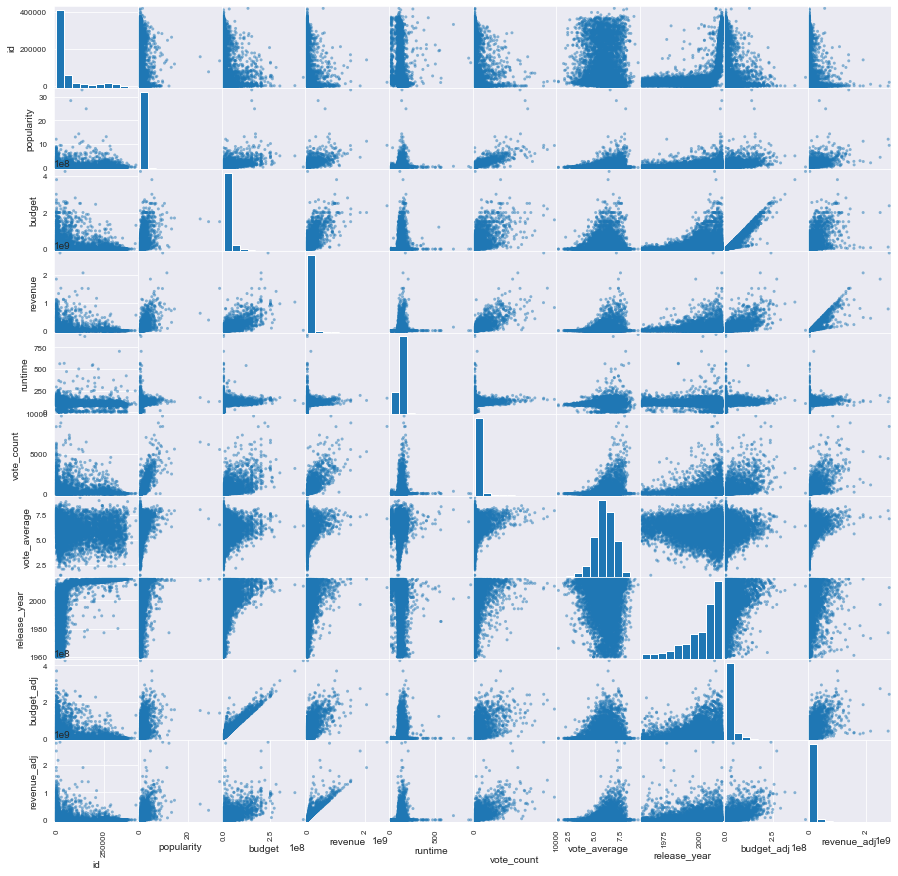

In [11]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

> This matrix gives us overview about some clear trends like positive correlation between budget and review, popularity and vote count, and release year and revenue_adj. <br>

> It also shows us some problems with our data set like the three outliers in the popularity column which we need to get rid of to have a fair judgment.<br>

### Research Question 1 (How did the rating of genres changed through years?)

In [12]:
#cleaning rows with null genre value
df_genres = df.dropna(subset=['genres'])

In [13]:
cols_to_change = ['genres']

In [14]:
#to change the values in genre column to a list
#this yields a warning that we are overwriting a column so we will ignore it
for col in cols_to_change:
    df_genres[col] = df_genres[col].str.split('|')

C:\Users\mohab\AppData\Local\Temp/ipykernel_2128/3892881310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genres[col] = df_genres[col].str.split('|')


In [15]:
#to divide genres in separate rows
df_genres = df_genres.apply(lambda x: x.explode()).reset_index()
df_genres.head()

,index,id,popularity,budget,revenue,cast,director,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
2,0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
3,0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
4,1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In [22]:
df_genres['genres'].value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

In [23]:
top_10 = df_genres['genres'].value_counts().head(10).index.values.tolist()
top_10

['Drama',
 'Comedy',
 'Thriller',
 'Action',
 'Romance',
 'Horror',
 'Adventure',
 'Crime',
 'Family',
 'Science Fiction']

These are the genres we will use in any comparisons involving genres.

In [24]:
# group release year by 10 years
bin_edges = [1959, 1969, 1979, 1989, 1999, 2009, 2019]
bin_names = ['1960:1969', '1970:1979', '1980:1989', '1990:1999', '2000:2009', '2010:2019']
df_genres['period'] = pd.cut(df_genres['release_year'], bin_edges, labels=bin_names)

In [25]:
#counting no of genres in each period
movies_in_period = df_genres.groupby('period')['id'].nunique().rename('count')
movies_in_period

period
1960:1969     362
1970:1979     506
1980:1989    1062
1990:1999    1763
2000:2009    3556
2010:2019    3593
Name: count, dtype: int64

##### This shows that for later decades the conclusions will be more concrete as we have many more samples

In [26]:
#Filter the data frame for the top 10 genres
#add a column for the number of movies in the period
# and another one to get the proportion of genre in each period
filtered_genres = df_genres[df_genres['genres'].isin(top_10)]
filtered_genres['no_of_movies'] = filtered_genres.merge(movies_in_period,how='left', left_on='period', right_index=True)['count']
filtered_genres['proportion'] = 1 / filtered_genres['no_of_movies']
filtered_genres.head()

C:\Users\mohab\AppData\Local\Temp/ipykernel_2128/252284634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genres['no_of_movies'] = filtered_genres.merge(movies_in_period,how='left', left_on='period', right_index=True)['count']
C:\Users\mohab\AppData\Local\Temp/ipykernel_2128/252284634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genres['proportion'] = 1 / filtered_genres['no_of_movies']


,index,id,popularity,budget,revenue,cast,director,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,period,no_of_movies,proportion
0,0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,2010:2019,3593,0.000278
1,0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,2010:2019,3593,0.000278
2,0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,2010:2019,3593,0.000278
3,0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,2010:2019,3593,0.000278
4,1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2010:2019,3593,0.000278


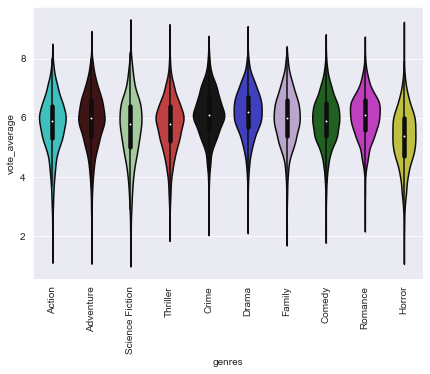

In [27]:
color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow','#520000', '#171616', '#bb92e0', '#98df8a']
color_map = {}
for i, x in enumerate(top_10):
    color_map[x] = color[i] 
plt.figure(figsize=(7, 5))
ax = sns.violinplot(x="genres", y="vote_average", data=filtered_genres, palette=color_map, saturation =0.5, width =0.8,)
ax.tick_params(axis='x', rotation=90)

This graph helps us make a general idea about the quality of each genre.<br>
It shows that Drama and Romance movies have the highest average and relatively the lowest variation as opposed to horror and science fiction movies with the lowest average and highest variation.<br>
We will discuss next how these ratings have changed with time.

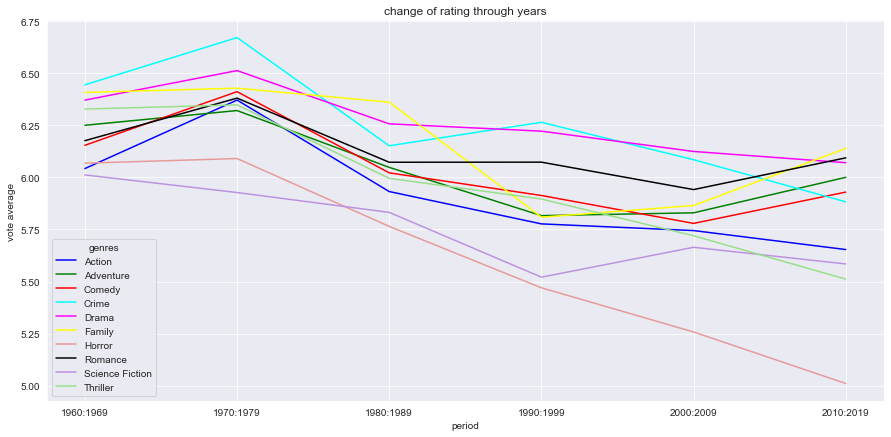

In [28]:
# title and labels
color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow','#e69a9a', 'black', '#bb92e0', '#98df8a']
fig, ax = plt.subplots(figsize=(15,7))
ax.set_prop_cycle(color=color)
ax.set_ylabel('vote average')
ax.set_title('change of rating through years')
# use unstack()
filtered_genres.groupby(['period','genres']).mean()['vote_average'].unstack().plot(ax=ax);

We won't know for sure if this fluctuation is because the changing of the quality or personal's prefrences have shifted but we are sure that the rating of horror movies is in a steep decline unlike romance, family, adventure, and comedy which are showing gradual improvement especially in the last decade.

### Research Question 2  (How did the popularity of each genre changed through years?)

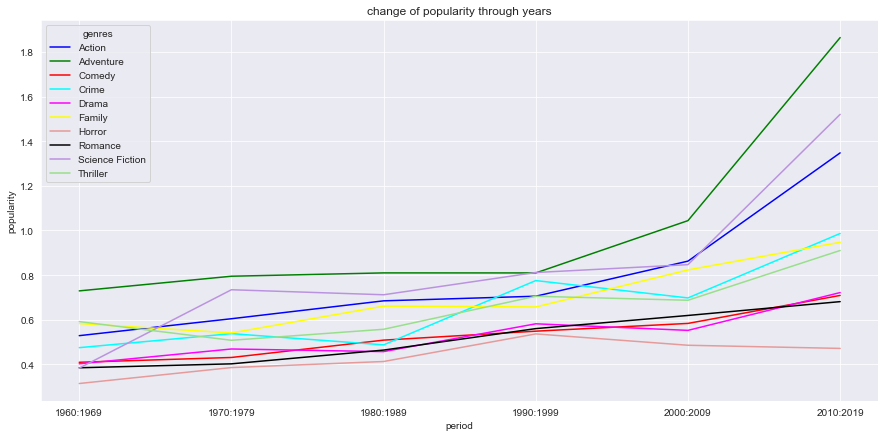

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_prop_cycle(color=color)
ax.set_ylabel('popularity')
ax.set_title('change of popularity through years')
filtered_genres.groupby(['period','genres']).mean()['popularity'].unstack().plot(ax=ax);

Popularity of adventure, Science fiction, action movies are on upward trend. While the popularity of horror movies are on level with its rating as the lowest in top 10.

### Research Question 3  (How did the proportion of each genre in total movies changed through years?)

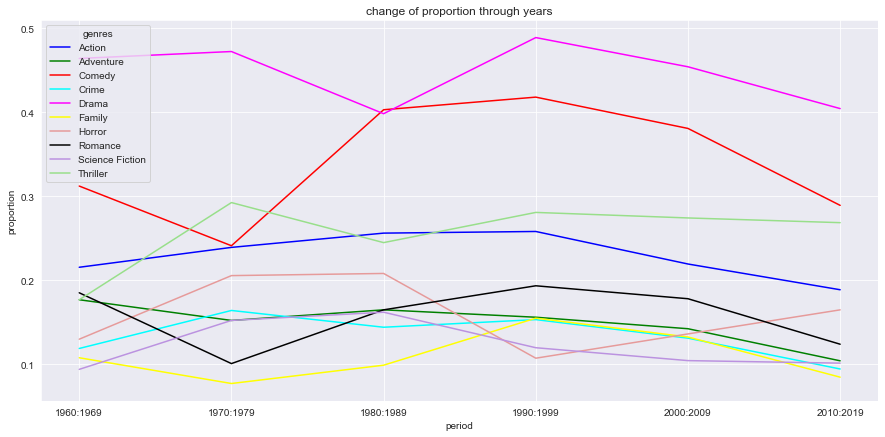

In [30]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_prop_cycle(color=color)
ax.set_ylabel('proportion')
ax.set_title('change of proportion through years')
filtered_genres.groupby(['period','genres']).sum()['proportion'].unstack().plot(ax=ax);

Drama, comedy, and thriller genres managed to stay at top with a big margin through out all the studied period.

### Research Question 4  (How did the revenue percentage of each genre changed through years?)
##### revenue percentage = (revenue adj / budget adj) *100

To answer this first we need to clean the data about revenue as many values in the budget column is 0 so we will drop it. <br>We will also drop the last quarter of revenue percentage as it seems there is many oultiers with illogical ratio between revenue and budget.

In [31]:
df_genres = df_genres[(df_genres['revenue_adj'] != 0) & (df_genres['budget_adj'] !=0) & (df_genres['popularity'] < 20)]
df_genres['revenue_percentage'] = ((df_genres['revenue'] - df_genres['budget']) / df_genres['budget']) *100
df_genres = df_genres[df_genres['revenue_percentage'] <= 2.522727e+02]
average_rev = df_genres.groupby('period')['revenue_adj'].mean()
average_bud = df_genres.groupby('period')['budget_adj'].mean()
average_bud

period
1960:1969    6.056589e+07
1970:1979    5.056629e+07
1980:1989    3.441973e+07
1990:1999    5.392705e+07
2000:2009    5.333121e+07
2010:2019    4.997274e+07
Name: budget_adj, dtype: float64

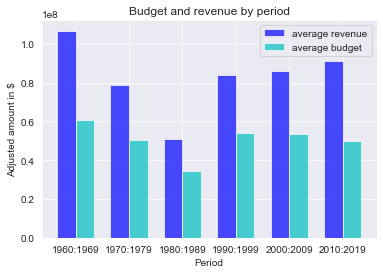

In [32]:
ind = np.arange(len(average_rev))  # the x locations for the groups
width = 0.35
red_bars = plt.bar(ind, average_rev, width, color='b', alpha=.7, label='average revenue')
white_bars = plt.bar(ind + width, average_bud, width, color='c', alpha=.7, label='average budget')
plt.ylabel('Adjusted amount in $')
plt.xlabel('Period')
plt.title('Budget and revenue by period')
locations = ind + width / 2  # xtick locations
labels = average_bud.index.tolist()  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

After taking a hit in the eighties it seems that for the last three decades movie production revenue is on the rise while simultaneously finding ways to reduce costs.

### Research Question 5  (How did the rating of the movie, popularity, and adjusted budget correlate?)

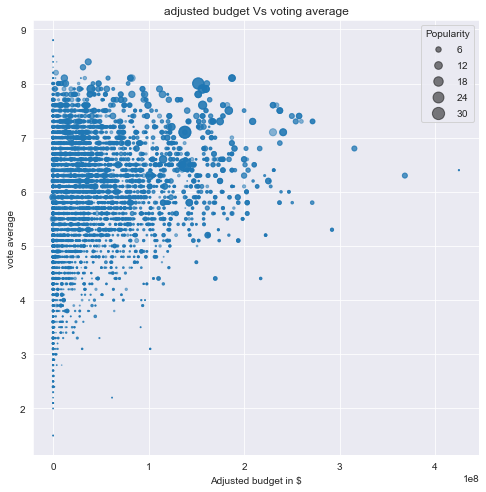

In [33]:
plt.figure(figsize=(8, 8))
plt.xlabel('Adjusted budget in $')
plt.ylabel('vote average')
plt.title('adjusted budget Vs voting average')
g = lambda s: s/5
sc = plt.scatter(filtered_genres['budget_adj'], filtered_genres['vote_average'], s=filtered_genres['popularity']*5, alpha=0.5)
plt.legend(*sc.legend_elements('sizes', num=6, func=g), title = 'Popularity');

This graph shows a positive correlation between increasing the budget and having a higher rating. <br>
Another positive correlation shown here is between popularity and rating but we can't tell for sure which is the independent variable.<br>
No correlation is clear between budget and popularity

<a id='conclusions'></a>
## Conclusions

> Cinema production was taking uniform steps forward increasing the gap between budget and revenue, however we must wait for new data to know how the covid outbreak influenced the results.

> Rating of the movie is affected by the budget spent and the genre among other variables.

> It is predicted that in the next few years we will see a change in the proportion of movies in each genre based on the popularity and rating average.

#### Shortcomings and limitations
> This analysis has some limitations as a result of the huge difference in the number of samples whether we are talking about periods or genres.<br>

> For example when we are comparing periods we will notice that the number of samples between 2010-2019 is nearly ten times the number in the sixties.<br>
This can lead us to think that the production of movies showed a huge spike lately but it will cause some uncertainties when studying these early periods. A huge doubt is placed on the big revnue gained in the sixties because of this lesser number of samples.

> Talking about top 10 genres we can see that drama has +4500 samples while science fiction has only +1200 samples. If the sample is totally random then this means that drama movies are produced much more and this is true. On the other hand some uncertainties are present when drawing conclusions about the bottom genres.